## Predicting patterns in customer behavior that can help identify customers who are likely to churn soon from SyriaTel's services. 

### Phase 3 Group Project Members:
* Joseph Kinuthia 
* John Mark
* Peter Kariuki
* Collins Kanyiri
* Calvin Kipkirui
* Raphael Muthemba

## 1. Introduction

***
In today's rapidly evolving telecommunications landscape, customer churn remains a significant challenge that directly impacts business profitability and sustainability. Customer churn, also known as customer attrition or customer turnover, refers to the phenomenon where customers stop doing business with a company or stop using its services. Churn analysis is commonly used in various industries to understand why customers leave, predict which customers are likely to churn, and develop strategies to retain customers. With the increasing prevalence of choices and options available to consumers, telecommunications companies must navigate the delicate balance of attracting new customers while retaining their existing ones. 

* N\B: One of the key questions that arises concerns predictable patterns in customer behavior that can help identify customers who are likely to churn soon from a firm's services. 

This question is at the heart of our project, where we delve into the realm of predictive analytics to uncover insights that can shape the future of customer retention strategies. Our focus is on SyriaTel, a telecommunications company dedicated to providing cutting-edge services to its customers. By harnessing the power of data analysis and machine learning, we aim to provide SyriaTel with the tools to proactively identify potential churners and implement targeted efforts for retaining their valuable customer base.

In the following sections of our project, we will embark on a comprehensive journey through the telecom dataset provided by SyriaTel. We will explore the rich tapestry of customer interactions, behaviors, and characteristics that contribute to the phenomenon of churn. We will also delve into the interpretability of our predictive models, seeking to understand the features and behaviors that have the most significant impact on churn prediction. Armed with this knowledge, SyriaTel can make informed decisions about targeted interventions and tailored strategies to enhance customer satisfaction and retention.
***



## 2. Business Understanding

*** 
### Stakeholders:
The success of this project relies on collaboration among several key stakeholders:

* SyriaTel Management: As the ultimate decision-makers, they're vested in the project's outcomes for improved business performance.
* Marketing Team: They will utilize insights to design targeted retention campaigns and optimize customer engagement strategies.
* Customer Support Team: The findings will help them identify customer pain points and enhance support services.
* Data Science Team (Project Team): Responsible for executing the project, analyzing data, and creating predictive models.

### Direct Impact:
The creation of this project directly affects the core operations of SyriaTel, impacting customer retention strategies, revenue streams, and customer satisfaction levels.

### Business Problem(s) Solved:
This Data Science endeavor addresses the critical business problem of customer churn. It aims to predict potential churners and guide SyriaTel in proactive strategies to minimize attrition. In this sense, our research questions are:

    * Can a predictive model accurately forecast whether a customer is likely to churn based on the available attributes and usage metrics?

    * Which features contribute the most to the model's predictions?
    
    * How well does the developed model generalize to new, unseen data? Are there certain patterns that the model consistently struggles to capture?

### Scope of the Project:
Inside the project's scope are the following components:

* Churn Prediction: Developing machine learning models to predict customer churn.
* Feature Analysis: Identifying significant features and behaviors linked to customer churn.
* Recommendations: Offering actionable suggestions to curb churn and enhance retention.

### Outside the Scope:
While the project tackles the formidable challenge of churn prediction, certain aspects lie beyond its immediate purview. Specifically, the implementation of recommended strategies to mitigate churn is a subsequent endeavor. Additionally, the evaluation of the financial impact arising from the project's outcomes is a distinct consideration.

### Data Sources:
It's important to note that the project's data originates from Kaggle, a well-regarded platform for diverse datasets. The SyriaTel telecommunications dataset, sourced from Kaggle, forms the cornerstone of our analysis, offering a comprehensive array of customer behaviors, usage patterns, and churn-related data.

### Expected Timeline:
The projected timeline for the completion of this venture is estimated at approximately 2-3 months. While stringent deadlines do not apply, the project is tailored to provide timely insights that align with SyriaTel's retention strategies.

### Stakeholder Alignment:
Even as stakeholders from disparate realms of the organization may possess a foundational grasp of the project's underpinnings, the utmost importance is placed on cultivating a shared and comprehensive understanding. This is achieved through consistent communication, updates, and clarifications, ensuring the alignment of objectives and aspirations across all stakeholders involved.
***

## 3. Problem Statement

***
In the landscape of modern telecommunications, the persistent challenge of customer churn demands strategic solutions that transcend conventional practices. SyriaTel, a telecommunications company aiming to enhance customer retention, faces the pressing question: Are there discernible patterns in customer behavior that can aid in the early identification of customers on the brink of churning? This project encapsulates the endeavor to unravel these patterns, employing data science techniques to predict customer churn and provide actionable insights for SyriaTel's proactive retention efforts.

### Challenge:
The primary challenge lies in SyriaTel's pursuit of understanding and predicting customer behavior that leads to churn. The vast volume of customer data available needs to be distilled into predictive models that not only forecast potential churn but also offer valuable insights for targeted interventions.

### Objective:
The objective of this project is to build a classifier developing accurate predictive models capable of identifying customers who are likely to churn soon. By delving into the dataset and analyzing customer attributes, usage patterns, and interactions, we aim to uncover patterns that contribute to churn, ultimately enabling SyriaTel to mitigate customer attrition.

This project encompasses data preprocessing, exploratory data analysis, feature engineering, machine learning model development, and the interpretation of model results. It involves understanding the correlation between various customer attributes, usage metrics, and churn rates, thereby offering insights into patterns that can inform SyriaTel's proactive efforts.The expected outcome is a set of predictive models capable of accurately forecasting customer churn. The insights derived from these models will not only aid SyriaTel in identifying potential churners but also guide the formulation of tailored strategies for customer engagement and retention.
### Benefits
By successfully addressing the challenge of predicting customer churn, SyriaTel stands to gain several benefits:
* Proactive Retention: The ability to identify potential churners in advance allows for targeted interventions and personalized retention strategies.
* Enhanced Customer Satisfaction: Addressing pain points revealed by the data can lead to improved customer satisfaction and loyalty.
* Optimized Resource Allocation: Precise churn predictions enable resource allocation for retention efforts, optimizing operational efficiency.
* Business Sustainability: By reducing churn, SyriaTel can bolster its revenue streams and establish a solid foundation for long-term growth.
***

## 4. Data Understanding

***
In the pursuit of understanding our data, we delve into a comprehensive exploration of the datasets that underpin our project. This stage involves unraveling the intricacies of the data we have at hand, as well as gaining insights into the origins, characteristics, and potential limitations of the data. Our primary source of data for this project is the SyriaTel dataset, retrieved from Kaggle. This dataset encapsulates a myriad of customer interactions, usage patterns, and churn-related information, serving as a valuable foundation for our predictive models.
The data sources are under the control of the SyriaTel organization. The necessary steps to access the data involve obtaining necessary permissions or credentials, and potentially liaising with the relevant data custodians within the organization.
***

### Target Variable:

Our target variable is "churn," which signifies whether a customer has churned or not. This binary boolean-type variable forms the core of our predictive modeling, as we aim to predict whether a customer is likely to churn in the future.

### Predictors and Data Types:

* state: the state the customer lives in (Categorical: String/Object)

* account length: the number of days the customer has had an account 

* area code: the area code of the customer

* phone number: the phone number of the customer

* international plan: true if the customer has the international plan, 
otherwise false

* voice mail plan: true if the customer has the voice mail plan, otherwise false

* number vmail messages: the number of voicemails the customer has sent

* total day minutes: total number of minutes the customer has been in calls during the day

* total day calls: total number of calls the user has done during the day

* total day charge: total amount of money the customer was charged by the Telecom company for calls during the day

* total eve minutes: total number of minutes the customer has been in calls during the evening

* total eve calls: total number of calls the customer has done during the evening

* total eve charge: total amount of money the customer was charged by the Telecom company for calls during the evening

* total night minutes: total number of minutes the customer has been in calls during the night

* total night calls: total number of calls the customer has done during the night

* total night charge: total amount of money the customer was charged by the Telecom company for calls during the night

* total intl minutes: total number of minutes the user has been in international calls

* total intl calls: total number of international calls the customer has done

* total intl charge: total amount of money the customer was charged by the Telecom company for international calls

* customer service calls: number of calls the customer has made to customer service


In [1]:
# Read data from csv file & create dataframe. Checking the first 5 rows.
import pandas as pd
data = pd.read_csv('Churn in Telecoms dataset.csv')
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Data Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
# Convert 'international plan' to boolean type
data['international plan'] = data['international plan'].map({'yes': True, 'no': False})

# Convert 'voice mail plan' to boolean type
data['voice mail plan'] = data['voice mail plan'].map({'yes': True, 'no': False})

In [5]:
# confermation of changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   bool   
 5   voice mail plan         3333 non-null   bool   
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
# statistical summary of the data
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
# check the toal number of null values in each column
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

## OUTLIERS

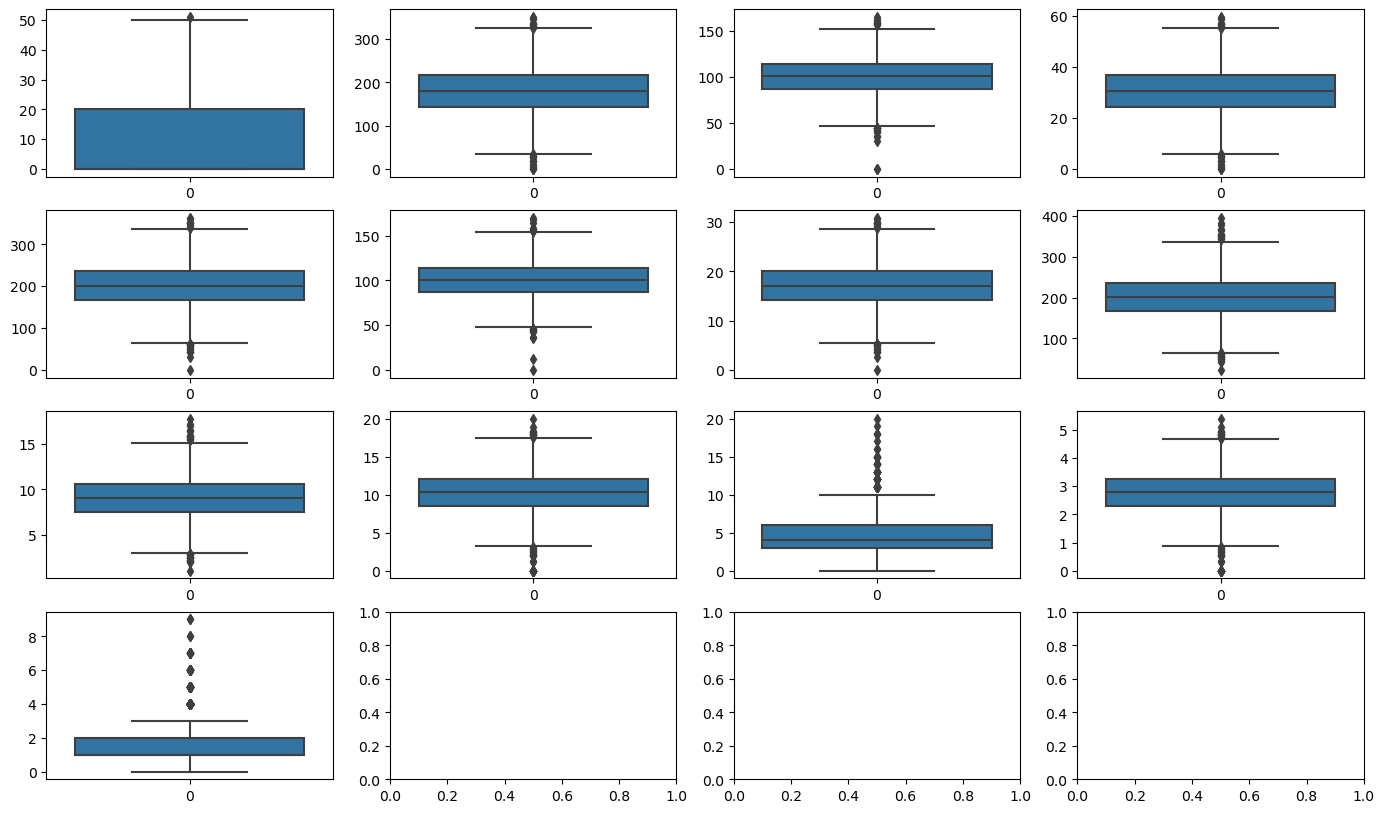

In [8]:
#plot the columns with more than single digits count.
fig, axs = plt.subplots(4,4, figsize = (17,10))
plt1 = sns.boxplot(data['number vmail messages'], ax = axs[0,0])
plt2 = sns.boxplot(data['total day minutes'], ax = axs[0,1])
plt3 = sns.boxplot(data['total day calls'], ax = axs[0,2])
plt4 = sns.boxplot(data['total day charge'], ax = axs[0,3])
plt5 = sns.boxplot(data['total eve minutes'], ax = axs[1,0])
plt6 = sns.boxplot(data['total eve calls'], ax = axs[1,1])
plt7 = sns.boxplot(data['total eve charge'], ax = axs[1,2])
plt8 = sns.boxplot(data['total night minutes'], ax = axs[1,3])
plt9 = sns.boxplot(data['total night charge'], ax = axs[2,0])
plt10 = sns.boxplot(data['total intl minutes'], ax = axs[2,1])
plt11 = sns.boxplot(data['total intl calls'], ax = axs[2,2])
plt12 = sns.boxplot(data['total intl charge'], ax = axs[2,3])
plt13 = sns.boxplot(data['customer service calls'], ax = axs[3,0])
plt.savefig('./images/fig1.png')

In [9]:
to_modify = ['number vmail messages', 'total day minutes', 'total day calls','total day charge','total eve minutes','total eve calls','total eve charge','total night minutes','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
for col in to_modify:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[col] >= Q1 - 1.5*IQR) & (data[col] <= Q3 + 1.5*IQR)]

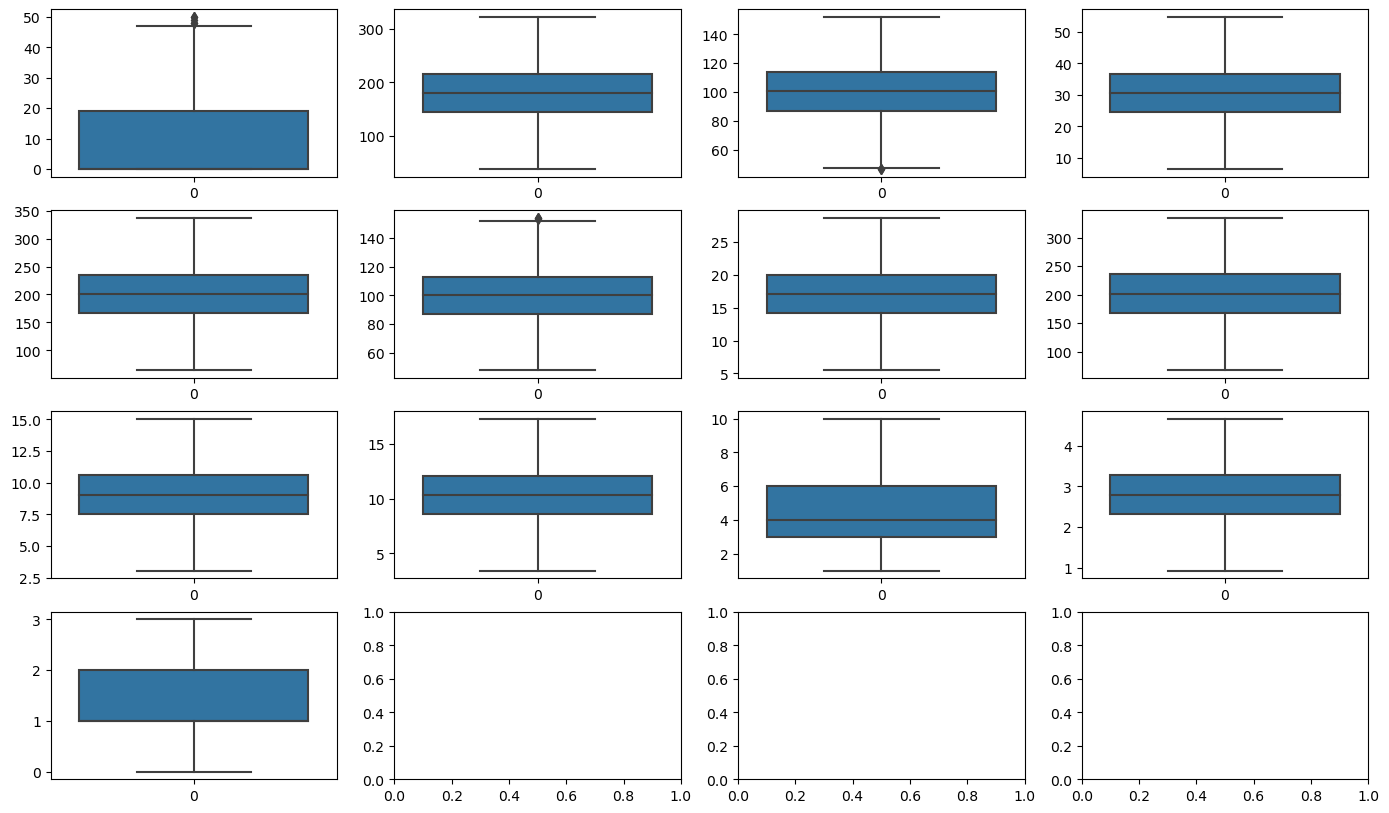

In [10]:
#Plot them again to check the results
# check the data after modification
fig, axs = plt.subplots(4,4, figsize = (17,10))
plt1 = sns.boxplot(data['number vmail messages'], ax = axs[0,0])
plt2 = sns.boxplot(data['total day minutes'], ax = axs[0,1])
plt3 = sns.boxplot(data['total day calls'], ax = axs[0,2])
plt4 = sns.boxplot(data['total day charge'], ax = axs[0,3])
plt5 = sns.boxplot(data['total eve minutes'], ax = axs[1,0])
plt6 = sns.boxplot(data['total eve calls'], ax = axs[1,1])
plt7 = sns.boxplot(data['total eve charge'], ax = axs[1,2])
plt8 = sns.boxplot(data['total night minutes'], ax = axs[1,3])
plt9 = sns.boxplot(data['total night charge'], ax = axs[2,0])
plt10 = sns.boxplot(data['total intl minutes'], ax = axs[2,1])
plt11 = sns.boxplot(data['total intl calls'], ax = axs[2,2])
plt12 = sns.boxplot(data['total intl charge'], ax = axs[2,3])
plt13 = sns.boxplot(data['customer service calls'], ax = axs[3,0])
plt.savefig('./images/fig2.png')

 # Creating categorical and numerical columns

In [11]:
# Creating categorical columns
categorical_columns = ['state', 'area code', 'international plan', 'voice mail plan', 'churn']
# Creating numerical columns
numeric_columns = data.drop(categorical_columns, axis=1)

## Analyzing of 'churn', our target variable

In [12]:
# identify Target Variable
target_variable = 'churn'
T = data[target_variable]
# Display value counts of unique items
print(T.value_counts())


churn
False    2521
True      309
Name: count, dtype: int64


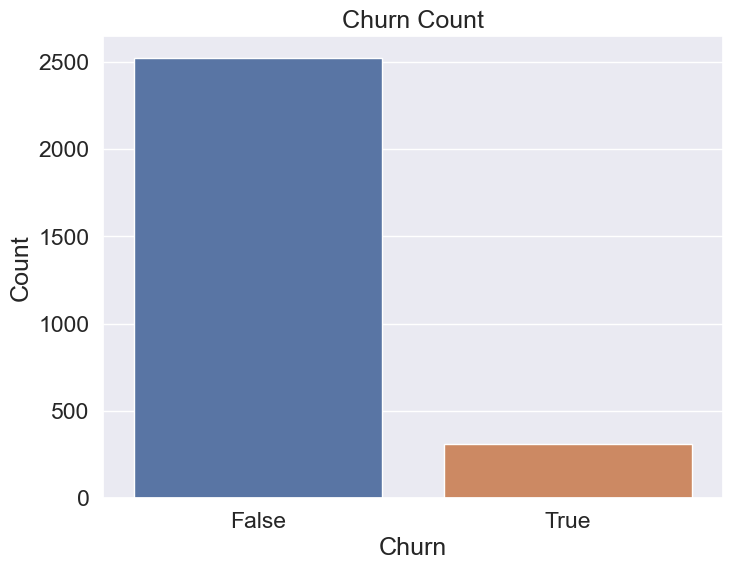

In [13]:
# Set custom font parameters
sns.set(font_scale=1.5)

# Create a countplot of the 'churn' feature
plt.figure(figsize=(8, 6))  
sns.countplot(x='churn', data=data)
plt.title("Churn Count")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.savefig('./images/fig3.png')

## Observation
Data imbalance

## Feature Selection

In [14]:
# Select relevant columns for modeling
selected_columns = ['account length', 'international plan', 'voice mail plan',
                    'number vmail messages', 'total day minutes', 'total day calls',
                    'total day charge', 'total eve minutes', 'total eve calls',
                    'total eve charge', 'total night minutes', 'total night calls',
                    'total night charge', 'total intl minutes', 'total intl calls',
                    'total intl charge', 'customer service calls', 'churn']

In [15]:
# Reassign data to include selected columns
data = data[selected_columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          2830 non-null   int64  
 1   international plan      2830 non-null   bool   
 2   voice mail plan         2830 non-null   bool   
 3   number vmail messages   2830 non-null   int64  
 4   total day minutes       2830 non-null   float64
 5   total day calls         2830 non-null   int64  
 6   total day charge        2830 non-null   float64
 7   total eve minutes       2830 non-null   float64
 8   total eve calls         2830 non-null   int64  
 9   total eve charge        2830 non-null   float64
 10  total night minutes     2830 non-null   float64
 11  total night calls       2830 non-null   int64  
 12  total night charge      2830 non-null   float64
 13  total intl minutes      2830 non-null   float64
 14  total intl calls        2830 non-null   int64

In [16]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['international plan', 'voice mail plan', 'churn'], drop_first=True)

# Display the updated dataset
data.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_True,voice mail plan_True,churn_True
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,True,False
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,True,False
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,False,False
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,True,False,False
5,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,True,False,False


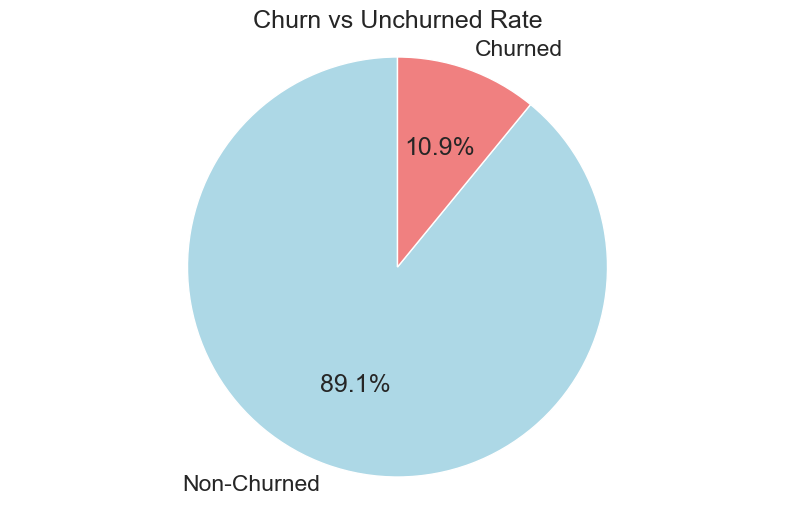

In [17]:
#Check for 'churn'value counts
data['churn_True'].value_counts(normalize=True)

# Count the number of churned and non-churned customers
churn_counts = data['churn_True'].value_counts()

# Create a pie chart to visualize the churn
plt.figure(figsize=(10, 6))
plt.pie(churn_counts, labels=['Non-Churned', 'Churned'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Churn vs Unchurned Rate')
plt.axis('equal')
plt.savefig('./images/fig4.png')

The data visualization shows the churn rate in the dataset. Most of the customers lie under the non-churned section at 89.1%, while only 10.9% of customers had churned, an indication of class imbalance. This class imbalance can lead to biased prediction and inadequate representation of the churn class in the modeling process. This issue can be addressed usine SMOTE (Synthetic Minority Over-Sampling Technique).

### Address churn class imbalance

In [18]:

from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = data.drop(columns=['churn_True'])
y = data['churn_True']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
data_resampled = pd.DataFrame(X_resampled, columns=X.columns) 
data_resampled['churn_True'] = y_resampled
y_resampled.value_counts()

churn_True
False    2521
True     2521
Name: count, dtype: int64

## train test split and scaler

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Encode categorical variables 
X = pd.get_dummies(X_resampled, drop_first=True)

# Perform train test split evenly
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.5, random_state=42)
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

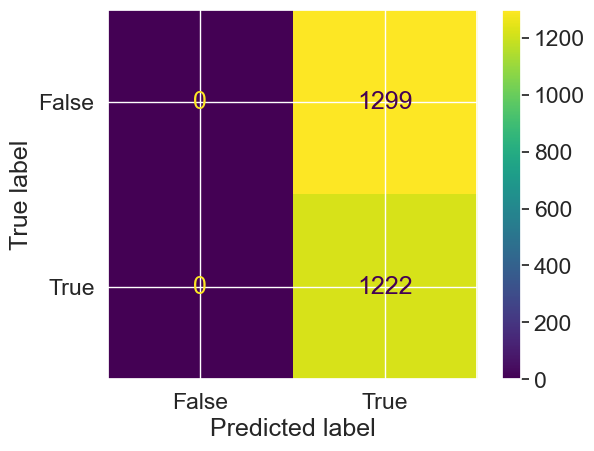

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier

ConfusionMatrixDisplay.from_estimator(estimator=DummyClassifier(strategy='constant', constant=1).fit(X_train_scaled, y_train),
                                       X=X_test_scaled, y=y_test);
plt.savefig('./images/fig5.png')

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
LR_model = LogisticRegression()
LR_model.fit(X_train_scaled, y_train)
LR_model

LogisticRegression()

In [22]:
# Evaluate the model performance using different metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Make predictions on the testing data
y_pred = LR_model.predict(X_test_scaled)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")


Accuracy: 0.89
Precision: 0.87
Recall: 0.90
F1 Score: 0.88
ROC AUC Score: 0.89


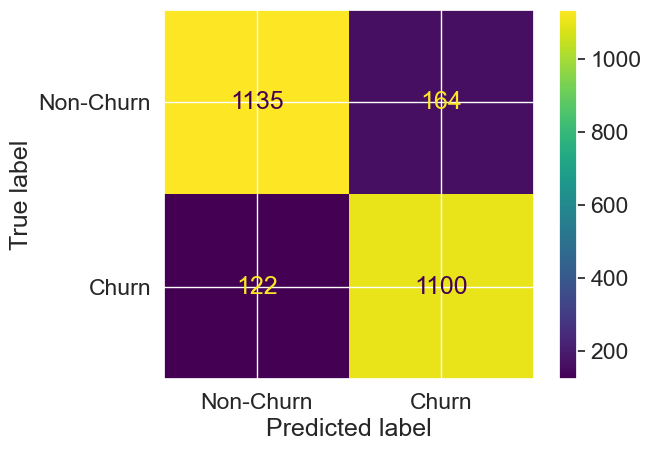

In [23]:
# Visualize the confusion matrix
CM_display = ConfusionMatrixDisplay.from_estimator(
    estimator=LR_model, X=X_test_scaled, y=y_test,
    display_labels=["Non-Churn", "Churn"])
plt.savefig('./images/fig6.png')

## Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Train a Desicion Tree model
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train_scaled, y_train)
DT_model

DecisionTreeClassifier()

In [26]:
# Evaluate the model performance using different metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Make predictions on the testing data
y_pred = DT_model.predict(X_test_scaled)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")


Accuracy: 0.89
Precision: 0.86
Recall: 0.92
F1 Score: 0.89
ROC AUC Score: 0.89


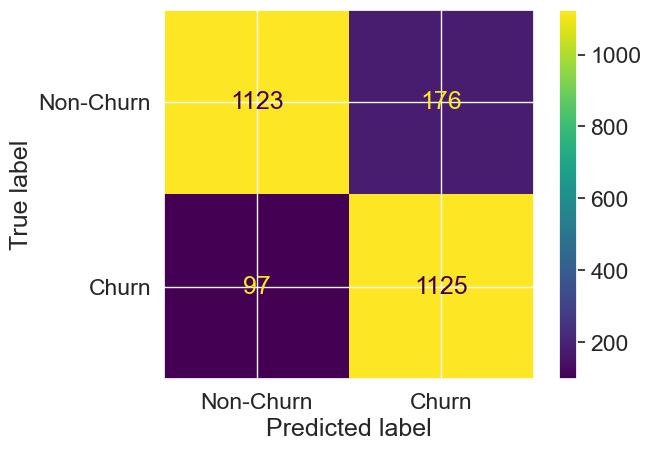

In [27]:
# Visualize the confusion matrix
CM_display = ConfusionMatrixDisplay.from_estimator(
    estimator=DT_model, X=X_test_scaled, y=y_test,
    display_labels=["Non-Churn", "Churn"])
plt.savefig('./images/fig7.png')

## Random Forest Model

In [28]:

from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Model
RF_model = RandomForestClassifier()
RF_model.fit(X_train_scaled, y_train)
RF_model

RandomForestClassifier()

In [29]:
# Evaluate the model performance using different metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Make predictions on the testing data
y_pred = RF_model.predict(X_test_scaled)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")


Accuracy: 0.94
Precision: 0.93
Recall: 0.95
F1 Score: 0.94
ROC AUC Score: 0.94


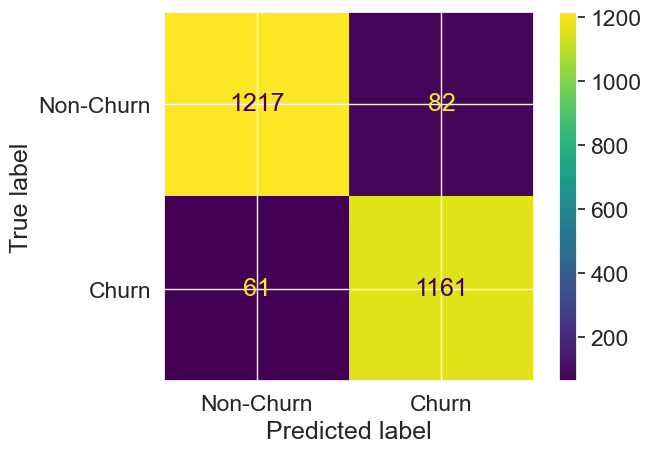

In [30]:
# Visualize the confusion matrix
CM_display = ConfusionMatrixDisplay.from_estimator(
    estimator=RF_model, X=X_test_scaled, y=y_test,
    display_labels=["Non-Churn", "Churn"])
plt.savefig('./images/fig8.png')

## Hyperparameter Tuning of Decision Tree Model

hyperparameters:
 - `random_state=1`
 - `max_depth=5`

In [31]:
#  second decision tree model
DT_tuned = DecisionTreeClassifier(random_state=1,max_depth=5)

# Fit the new model on the training data
DT_tuned.fit(X_train, y_train)
DT_tuned

DecisionTreeClassifier(max_depth=5, random_state=1)

In [33]:
# Evaluate the model performance using different metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Make predictions on the testing data
y_pred = DT_tuned.predict(X_test_scaled)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")


Accuracy: 0.71
Precision: 0.88
Recall: 0.46
F1 Score: 0.61
ROC AUC Score: 0.70


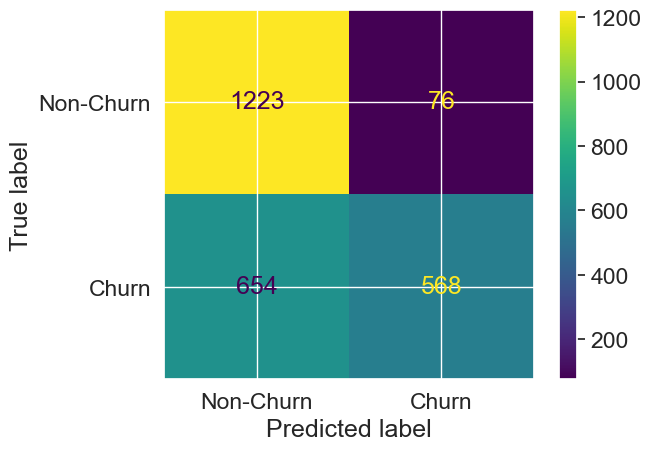

In [35]:
# Visualize the confusion matrix
CM_display = ConfusionMatrixDisplay.from_estimator(
    estimator=DT_tuned, X=X_test_scaled, y=y_test,
    display_labels=["Non-Churn", "Churn"])
plt.savefig('./images/fig9.png')